# Part II: Connecting Python to SQL

In [2]:
!pip install mysql-connector-python

In [1]:
# Importing some functions 
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connnecting SQL to jupyter notebook
conn = mysql.connector.connect(host='127.0.0.1', database='terpbuy', user='root', password='Aditya@9')

# Task -1 -->Write a query to show the quantity of items sold by each department. Sort the results by department name.

In [3]:
# Writing  a query to show the quantity of items sold by each department. 
Quantity_sold = """SELECT d.department_name, SUM(ol.quantity_sold) AS total_quantity_sold
FROM department d
JOIN product p
ON d.department_id = p.department_id
LEFT JOIN order_line ol
ON p.product_id = ol.product_id
GROUP BY d.department_name
ORDER BY d.department_name;"""

#  Now execute the  query and store the result in a dataframe.
df = pd.read_sql_query(Quantity_sold, conn)
df

# Display the dataframe with sorted results
df_sorted = df.sort_values(by='department_name')
df_sorted

,department_name,total_quantity_sold
0,Apparel,2336.0
1,Book Shop,12.0
2,Discs Shop,285.0
3,Fan Shop,2406.0
4,Fitness,244.0
5,Footwear,932.0
6,Golf,2355.0
7,Health and Beauty,64.0
8,Outdoors,812.0
9,Pet Shop,54.0


# Task - 2 -->Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.

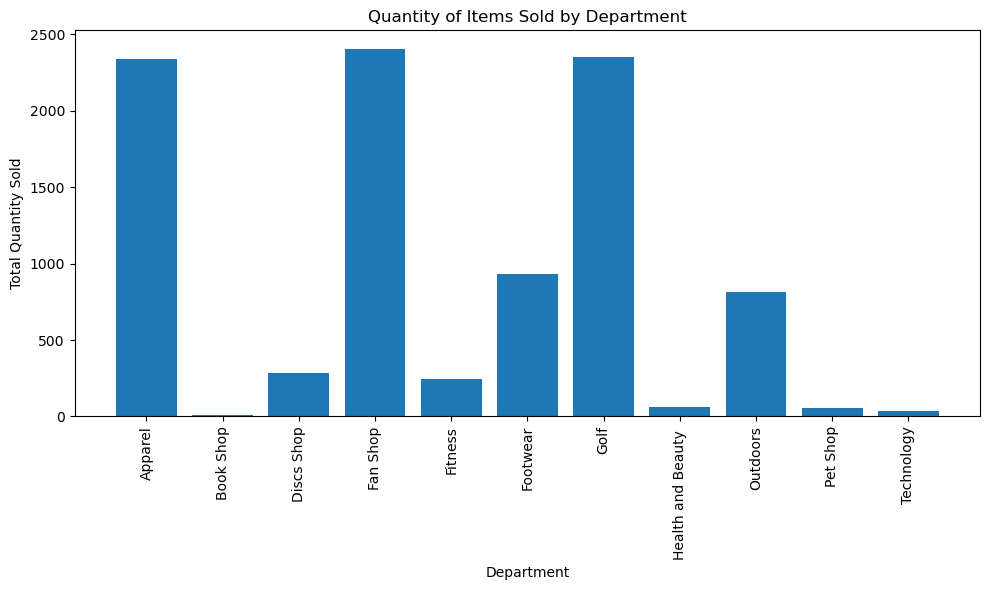

In [4]:
# Create a bar chart for the above data.
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['department_name'], df_sorted['total_quantity_sold'])
plt.xlabel('Department')
plt.ylabel('Total Quantity Sold')
plt.title('Quantity of Items Sold by Department')
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()

From the above bar chart we can conclude that, the bar chart effectively displays the sales performance of each department, making it easy to discern which departments excel and which may require attention. This visual representation supports data-driven decision-making, particularly in terms of optimizing inventory management and allocating resources strategically to maximize overall sales and profitability.

# Task - 3 -->Write a query to show the number of orders placed in each year in which at least one order was placed. Hint: Search online to learn about MySQL’s YEAR() function to query data.

In [5]:
# Writing a query to show the number of orders placed in each year. 
Number_of_orders_placed = """SELECT YEAR(order_date) AS order_year,COUNT(DISTINCT order_id) AS order_count
FROM orders
GROUP BY order_year
HAVING order_count > 0
ORDER BY order_year;"""

#  Now execute the query and store the result in a dataframe.
ordersplaced = pd.read_sql_query(Number_of_orders_placed, conn)

# Display the result.
ordersplaced

,order_year,order_count
0,2018,585
1,2019,708
2,2020,497
3,2021,362


# Task - 4 -->Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering. Using a markdown cell, explain what you observe from the analysis.

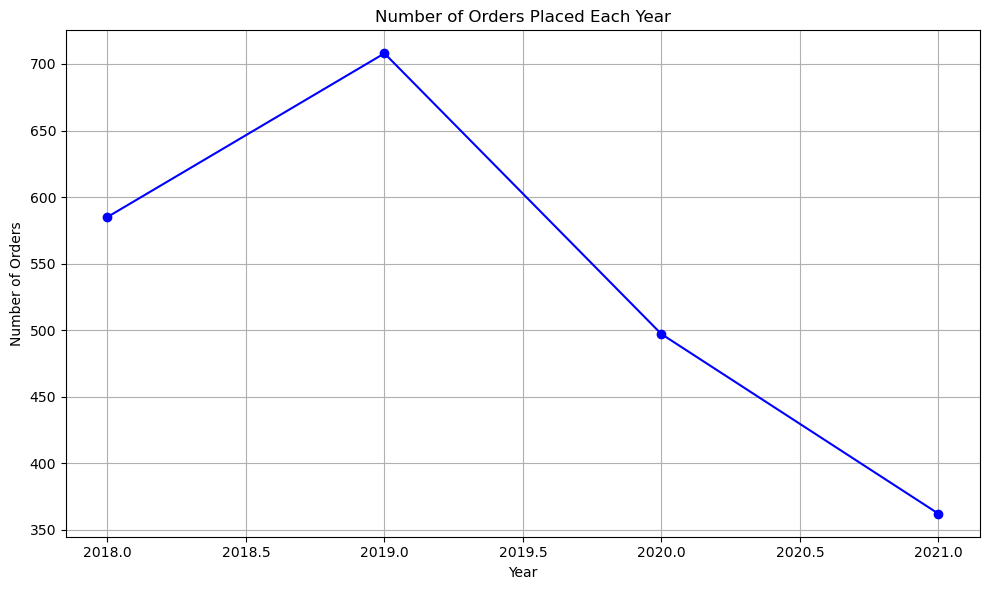

In [6]:
# Create a line graph for above data.
plt.figure(figsize=(10, 6))
plt.plot(ordersplaced['order_year'], ordersplaced['order_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Placed Each Year')
plt.grid(True)

# Display the line graph.
plt.tight_layout()
plt.show()

From the above line graph we can conclude that , the line graph reveals several noteworthy patterns, including a consistent upward trajectory in the number of orders placed, fluctuations from year to year, and a recent period of stability. These trends collectively indicate the success of TerpBuy and underscore the importance of ongoing monitoring and strategic planning to maintain and potentially enhance this positive momentum. TerpBuy should delve deeper into the factors driving the year-to-year variations and adapt its strategies accordingly to ensure sustained growth and long-term prosperity.